# Don't run this NOTEBOOK
# Make a copy and do experiments there

In [ ]:
!git clone https://github.com/udaylunawat/Whats-this-rock.git
%cd Whats-this-rock/

Cloning into 'Whats-this-rock'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 99 (delta 44), reused 77 (delta 27), pack-reused 0
Unpacking objects: 100% (99/99), done.
/content/Whats-this-rock


In [ ]:
!nvidia-smi

## Uploading Kaggle.json

In [ ]:
from google.colab import files
print("Upload Kaggle.json")
files.upload();

Upload Kaggle.json


Saving kaggle.json to kaggle.json


# Setup

In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 8.0 MB/s 
     |████████████████████████████████| 1.1 MB 51.7 MB/s 
     |████████████████████████████████| 462 kB 73.5 MB/s 
     |████████████████████████████████| 181 kB 67.1 MB/s 
     |████████████████████████████████| 145 kB 76.2 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=9c21624d2dc7221c4dada56bde073d9f81551045c20af44950807e9d62265273
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
!python preprocess.py

Streaming output truncated to the last 5000 lines.
  inflating: data/1_extracted/Rock_Dataset/minerals/Labradorite/Labradorite 187.jpg  
  inflating: data/1_extracted/Rock_Dataset/minerals/Labradorite/Labradorite 188.jpg  
  inflating: data/1_extracted/Rock_Dataset/minerals/Labradorite/Labradorite 189.jpg  
  inflating: data/1_extracted/Rock_Dataset/minerals/Labradorite/Labradorite 19.jpg  
  inflating: data/1_extracted/Rock_Dataset/minerals/Labradorite/Labradorite 190.jpg  
  inflating: data/1_extracted/Rock_Dataset/minerals/Labradorite/Labradorite 191.jpg  
  inflating: data/1_extracted/Rock_Dataset/minerals/Labradorite/Labradorite 192.jpg  
  inflating: data/1_extracted/Rock_Dataset/minerals/Labradorite/Labradorite 193.jpg  
  inflating: data/1_extracted/Rock_Dataset/minerals/Labradorite/Labradorite 194.jpg  
  inflating: data/1_extracted/Rock_Dataset/minerals/Labradorite/Labradorite 195.jpg  
  inflating: data/1_extracted/Rock_Dataset/minerals/Labradorite/Labradorite 196.jpg  
  in

In [6]:
!python efficientnet_train.py --epochs 30 \
                              --notes "Efficient Net" \
                              --learning_rate 0.00001 \
                              --sample_size 0.2 \
                              --batch_size 2048 \
                              --size 224
                            #   --pretrained_trainable True

wandb: Currently logged in as: udaylunawat (rock-classifiers). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.12.17
wandb: Run data is saved locally in /content/Whats-this-rock/wandb/run-20220529_134817-3cmv2us4
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run young-deluge-82
wandb: ⭐️ View project at https://wandb.ai/rock-classifiers/rock_classification
wandb: 🚀 View run at https://wandb.ai/rock-classifiers/rock_classification/runs/3cmv2us4
Found 1112 validated image filenames belonging to 4 classes.
Found 277 validated image filenames belonging to 4 classes.
Found 174 validated image filenames.
2022-05-29 13:48:21.562262: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like

# Deploy Telegram Bot

### Uploading secrets with telegram key

In [ ]:
print("Upload secrets.json")
files.upload();

# Creating DataFrame

In [ ]:
import pandas as pd
data = pd.read_csv('training_data.csv', index_col=0)
data.head()

,image_path,classes
0,data/2_processed/sedimentary rocks/Tufa56.jpg,sedimentary rocks
1,data/2_processed/sedimentary rocks/Tufa305.jpg,sedimentary rocks
2,data/2_processed/sedimentary rocks/Tufa73.jpg,sedimentary rocks
3,data/2_processed/sedimentary rocks/Tufa97.jpg,sedimentary rocks
4,data/2_processed/sedimentary rocks/Tufa6.jpg,sedimentary rocks


In [ ]:
len(data)

8685

In [ ]:
data.classes.value_counts()

minerals             4132
igneous rocks        2256
sedimentary rocks    1212
metamorphic rocks    1085
Name: classes, dtype: int64

In [ ]:
from utilities import get_stratified_dataset_partitions_pd

In [ ]:
# taking only 30% of the dataset and then doing stratified sampling
data = data.sample(frac=0.3).reset_index(drop=True)
# data = data.sample(frac=config['sample_size']).reset_index(drop=True)

In [ ]:
len(data)

2606

In [ ]:
# Splitting data into train, val and test samples using stratified splits
train_df, val_df, test_df = get_stratified_dataset_partitions_pd(data, 0.8, 0.1, 0.1)

In [ ]:
train_df.classes.value_counts()

minerals             973
igneous rocks        539
sedimentary rocks    309
metamorphic rocks    263
Name: classes, dtype: int64

In [ ]:
val_df.classes.value_counts()

minerals             130
igneous rocks         69
metamorphic rocks     32
sedimentary rocks     30
Name: classes, dtype: int64

In [ ]:
test_df.classes.value_counts()

minerals             117
igneous rocks         70
sedimentary rocks     40
metamorphic rocks     34
Name: classes, dtype: int64

In [ ]:
# test_df = data.groupby('classes', group_keys=False).apply(lambda x: x.sample((len(data)//10)//4))

In [ ]:
# train_df = train_df.drop(test_df.index)
# train_df = train_df.reset_index(drop=True)
# train_df.head()
# print(len(train_df))

# EDA

## Model training

In [ ]:
!nvidia-smi

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
AUTOTUNE = tf.data.AUTOTUNE

train_ds = tf.keras.utils.image_dataset_from_directory(
  "data/2_processed",
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  seed = 123,
  color_mode='rgb',
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  "data/2_processed",
  validation_split=0.2,
  subset="validation",
  image_size=(img_height, img_width),
  seed = 123,
  color_mode='rgb',
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 8650 files belonging to 4 classes.
Using 6920 files for training.
Found 8650 files belonging to 4 classes.
Using 1730 files for validation.
['igneous rocks', 'metamorphic rocks', 'minerals', 'sedimentary rocks']


In [ ]:
# https://stackoverflow.com/a/71137470/9292995
# test_dataset = val_ds.take(2595//3)
# val_ds = val_ds.skip(2595//3)

In [ ]:
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model 1

In [ ]:
from models import model1
model = model1()

In [ ]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 300, 300, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 298, 298, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 296, 296, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 148, 148, 32)     0         
 2D)                                                             
                                                                 
 global_average_pooling2d_9   (None, 32)               0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_20 (Dense)            (None, 128)               4224

> When we use the image loading method described here, the tf.keras.utils.image_dataset_from_directory utility, it will automatically read images and create a dataset and labels.

    According to tf.keras.utils.image_dataset_from_directory documentation, it supports four types of label_mode:

    'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss).
    'categorical' means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss).
    'binary' means that the labels (there can be only 2) are encoded as float32 scalars with values 0 or 1 (e.g. for binary_crossentropy).
    None (no labels).
    'int' seems to be the default label_mode. So, by default, tf.keras.utils.image_dataset_from_directory will create a set of labels for the dataset as scalars that go from 1 to the number of classes in the dataset.
    In this case, the model should be compiled with a 'sparse_categorical_crossentropy' loss.

    If we want to use one-hot encoded labels, set label_mode to 'categorical' in the call to tf.keras.utils.image_dataset_from_directory, then compile the model with a 'categorical_crossentropy' loss.

In [ ]:
num_classes = 4

# setting img dimensions for mobilenet
img_height = 160
img_width = 160

hyperparams = dict(
    lr = 0.0005,
    optimizer = 'adam',     # RMS
    batch_size = 512,
    epochs = 50,
    # filters = 64,
    # kernel_1 = (5,5),
    # kernel_2 = (3,3),
    # padding = 'same',
    # pooling = (2,2),
    # wd = 0.0,
    # lr_schedule = 'RLR',    # cos, cyclic, step decay
    # dense_units = 256,
    # activation = 'elu',      # elu, LeakyRelu
    # dropout = 0.25,
    # dropout_f = 0.5,
)

In [ ]:
notes = f'''
MobileNet with {hyperparams['optimizer']}, lr: {hyperparams['lr']}
'''

In [ ]:
from wandb.keras import WandbCallback
run = wandb.init(project=PROJECT_NAME, entity="rock-classifiers", config=hyperparams,
                 notes= notes)
config = wandb.config

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds, epochs = epochs, batch_size = batch_size, callbacks=[WandbCallback()])

Epoch 1/20
28/28 [==============================] - 35s 1s/step - loss: 155.4475 - accuracy: 0.4280 - _timestamp: 1653748465.0000 - _runtime: 60.0000
Epoch 2/20
28/28 [==============================] - 34s 1s/step - loss: 1.2429 - accuracy: 0.4788 - _timestamp: 1653748499.0000 - _runtime: 94.0000
Epoch 3/20
28/28 [==============================] - 34s 1s/step - loss: 1.2380 - accuracy: 0.4788 - _timestamp: 1653748540.0000 - _runtime: 135.0000
Epoch 4/20
28/28 [==============================] - 33s 1s/step - loss: 1.2406 - accuracy: 0.4788 - _timestamp: 1653748580.0000 - _runtime: 175.0000
Epoch 5/20
28/28 [==============================] - 33s 1s/step - loss: 1.2392 - accuracy: 0.4788 - _timestamp: 1653748621.0000 - _runtime: 216.0000
Epoch 6/20
28/28 [==============================] - 33s 1s/step - loss: 1.2409 - accuracy: 0.4788 - _timestamp: 1653748663.0000 - _runtime: 258.0000
Epoch 7/20
28/28 [==============================] - 33s 1s/step - loss: 1.2395 - accuracy: 0.4788 - _times

In [ ]:
run.finish()

accuracy,▁███████████████████
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.47876
epoch,19
loss,1.2382


In [ ]:
# model.fit(train_ds, validation_data = val_ds, epochs = epochs, batch_size = batch_size, callbacks=[WandbCallback()])

# VGG16 model

In [ ]:
# # Visualise the data
# import matplotlib.pyplot as plt 
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#     for i in range(9): 
#         ax = plt.subplot(3, 3, i + 1) 
#         plt.imshow(images[i].numpy().astype("uint8")) 
#         plt.title(int(labels[i])) 
#         plt.axis("off")
# # data augmentation
# data_augmentation = keras.Sequential(
#     [layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"), 
#      layers.experimental.preprocessing.RandomRotation(0.2),])
# # Visualise
# plt.figure(figsize=(10, 10))
# for images, _ in train_ds.take(1):
#     for i in range(9):
#         augmented_images = data_augmentation(images)
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(augmented_images[0].numpy().astype("uint8"))
#         plt.axis("off")

In [ ]:
num_classes = 4

# setting img dimensions for mobilenet
img_height = 160
img_width = 160

hyperparams = dict(
    lr = 0.0005,
    optimizer = 'adam',     # RMS
    batch_size = 512,
    epochs = 50,
    # filters = 64,
    # kernel_1 = (5,5),
    # kernel_2 = (3,3),
    # padding = 'same',
    # pooling = (2,2),
    # wd = 0.0,
    # lr_schedule = 'RLR',    # cos, cyclic, step decay
    # dense_units = 256,
    # activation = 'elu',      # elu, LeakyRelu
    # dropout = 0.25,
    # dropout_f = 0.5,
)

In [ ]:
notes = f'''
MobileNet with {hyperparams['optimizer']}, lr: {hyperparams['lr']}
'''

In [ ]:
from wandb.keras import WandbCallback
run = wandb.init(project=PROJECT_NAME, entity="rock-classifiers", config=hyperparams,
                 notes= notes)
config = wandb.config

In [ ]:
# https://keras.io/guides/transfer_learning/
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
base_model = tf.keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(32, 32, 3), # VGG16 expects min 32 x 32
    include_top=False)  # Do not include the ImageNet classifier at the top.
base_model.trainable = False

In [ ]:
number_of_classes = num_classes
inputs = tf.keras.Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
initializer = tf.keras.initializers.GlorotUniform(seed=42)
activation =  tf.keras.activations.softmax  # tf.keras.activations.sigmoid or softmax
outputs = tf.keras.layers.Dense(number_of_classes,
                             kernel_initializer=initializer,
                             activation=activation)(x) 
model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 14,716,740
Trainable params: 2,052
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from keras import metrics

In [ ]:
!pip install tensorflow-addons
import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=[tfa.metrics.F1Score(average='micro', num_classes=num_classes), 'accuracy'])
history = model.fit(train_ds, validation_data=val_ds, epochs = epochs, batch_size = batch_size, callbacks=[WandbCallback()])

Epoch 1/20
28/28 [==============================] - 21s 383ms/step - loss: 16.9656 - f1_score: 0.4285 - accuracy: 0.2923 - val_loss: 12.0623 - val_f1_score: 0.4277 - val_accuracy: 0.4058 - _timestamp: 1653751685.0000 - _runtime: 73.0000
Epoch 2/20
28/28 [==============================] - 15s 421ms/step - loss: 9.8403 - f1_score: 0.4285 - accuracy: 0.4146 - val_loss: 8.8087 - val_f1_score: 0.4277 - val_accuracy: 0.4318 - _timestamp: 1653751700.0000 - _runtime: 88.0000
Epoch 3/20
28/28 [==============================] - 15s 409ms/step - loss: 7.4611 - f1_score: 0.4285 - accuracy: 0.4426 - val_loss: 7.2470 - val_f1_score: 0.4277 - val_accuracy: 0.4445 - _timestamp: 1653751715.0000 - _runtime: 103.0000
Epoch 4/20
28/28 [==============================] - 15s 433ms/step - loss: 6.1128 - f1_score: 0.4285 - accuracy: 0.4568 - val_loss: 6.1435 - val_f1_score: 0.4277 - val_accuracy: 0.4590 - _timestamp: 1653751736.0000 - _runtime: 124.0000
Epoch 5/20
28/28 [==============================] - 19s 

# MobileNet with data augmentation

In [ ]:
# X = data.image_path
# y = data.classes

In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split

In [ ]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(data.classes)

# le.classes_

array(['igneous rocks', 'metamorphic rocks', 'minerals',
       'sedimentary rocks'], dtype=object)

In [ ]:
# # Split (train)
# X_train, X_, y_train, y_ = train_test_split(
#     X, y, train_size=0.7, stratify=y)

# print (f"train: {len(X_train)} ({(len(X_train) / len(X)):.2f})\n"
#        f"remaining: {len(X_)} ({(len(X_) / len(X)):.2f})")

In [ ]:
# # Split (test)
# X_val, X_test, y_val, y_test = train_test_split(
#     X_, y_, train_size=0.5, stratify=y_)

In [ ]:
# print(f"train: {len(X_train)} ({len(X_train)/len(X):.2f})\n"
#       f"val: {len(X_val)} ({len(X_val)/len(X):.2f})\n"
#       f"test: {len(X_test)} ({len(X_test)/len(X):.2f})")


## Training MobileNet

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random
import os
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

In [ ]:
num_classes = 4

# setting img dimensions for mobilenet
img_height = 160
img_width = 160

hyperparams = dict(
    lr = 0.00005,
    optimizer = 'adam',     # RMS
    batch_size = 512,
    epochs = 100,
    aug_horizontal_flip = True,
    aug_validation_split=0.2,
    aug_fill_mode = "nearest",
    aug_zoom_range = 0,
    aug_brightness_range=[0.4,1.5],
    aug_width_shift_range = 0.2,
    aug_height_shift_range = 0.2,
    aug_rotation_range = 45,
    aug_rescale=1./255.,
)

In [ ]:
notes = f'''
MobileNet with {hyperparams['optimizer']}, lr: {hyperparams['lr']}
'''

In [ ]:
from wandb.keras import WandbCallback
run = wandb.init(project=PROJECT_NAME, entity="rock-classifiers", config=hyperparams,
                 notes= notes)
config = wandb.config

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2, ResNet50V2

import matplotlib.pyplot as plt
import numpy as np
import json

# Create train, test, and validation datasets
# Image Size is 160 because ImageNet weights cannot work with 174
datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip = True,
                               validation_split=config['aug_validation_split'],
                               fill_mode = config['aug_fill_mode'],
                               zoom_range = config['aug_zoom_range'],
                               brightness_range=config['aug_brightness_range'],
                               width_shift_range = config['aug_width_shift_range'],
                               height_shift_range =config['aug_height_shift_range'],
                               rotation_range =config['aug_rotation_range'],
                               rescale=config['aug_rescale'])

# datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)

train_ds = datagen.flow_from_dataframe(
                  dataframe=data,
                  directory="./",
                  x_col="image_path",
                  y_col="classes",
                  subset="training",
                  batch_size=config.batch_size,
                  seed=42,
                  color_mode='rgb',
                  shuffle=True,
                  class_mode="categorical",
                  target_size=(160,160))

val_ds = datagen.flow_from_dataframe(
                  dataframe=data,
                  directory="./",
                  x_col="image_path",
                  y_col="classes",
                  subset="validation",
                  batch_size=config.batch_size,
                  seed=42,
                  color_mode='rgb',
                  shuffle=True,
                  class_mode="categorical",
                  target_size=(160,160))

test_datagen= tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

test_ds = test_datagen.flow_from_dataframe(
                  dataframe=test_df,
                  directory="./",
                  x_col="image_path",
                  y_col='classes',
                  batch_size=config.batch_size,
                  seed=42,
                  shuffle=False,
                  class_mode=None,
                  target_size=(160,160))

Found 6254 validated image filenames belonging to 4 classes.
Found 1563 validated image filenames belonging to 4 classes.
Found 868 validated image filenames.


In [ ]:
# Plot a processed image

def generate_random_processed_image():
  import seaborn as sns
  sns.set_style("white")
  generated_image, label = train_ds.__getitem__(random.randint(0, 13))
  plt.imshow(generated_image[0], cmap='gray')
  plt.colorbar()
  plt.title('Image')
  print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height")
  print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
  print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

generate_random_processed_image()

In [ ]:

# Get ImageNet weights, don't include final layers
mobilenet_pretrained = MobileNetV2(
    input_shape=(160, 160, 3), weights="imagenet", include_top=False
)

# Freeze layers
mobilenet_pretrained.trainable = False

# Add untrained final layers
model = keras.Sequential(
    [
        mobilenet_pretrained,
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dense(1024),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

# Higher learning rates = fast divergence
# Hyperparameters unoptimized
# Define the optimizer

LR = config.lr     # 0.001

if config.optimizer=='Adam':
    opt = tf.keras.optimizers.Adam(LR)
elif config.optimizer=='RMS':
    opt = tf.keras.optimizers.RMSprop(lr=LR, rho=0.9, epsilon=1e-08, decay=0.0)
elif config.optimizer=='Adam+SWA':
    opt = tf.keras.optimizers.Adam(LR)
    opt = tfa.optimizers.SWA(opt)
elif config.optimizer=='SGD':
    opt = tf.keras.optimizers.SGD(learning_rate = LR)
else: 
    opt = 'adam'    # native adam optimizer 
    
    
# Compile the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])


# Double size of training data and augment it
# train_ds = train_ds.repeat(2)

# data_augmentation = keras.Sequential(
#     [
#         keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#         keras.layers.experimental.preprocessing.RandomRotation(0.3),
#         keras.layers.experimental.preprocessing.RandomZoom(0.2),
#     ]
# )
# train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

# # MobileNet Preprocessing
# train_ds.map(
#     lambda img, label: (tf.keras.applications.mobilenet_v2.preprocess_input(img), label)
# )
# val_ds.map(
#     lambda img, label: (tf.keras.applications.mobilenet_v2.preprocess_input(img), label)
# )

# Save best checkpoints and stop early to save time
callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}_ft_0_001.h5", save_best_only=True),
    # keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5),
    WandbCallback()
]

# Train model
history = model.fit(train_ds, epochs = config.epochs, batch_size = config.batch_size, callbacks=callbacks, validation_data=val_ds)

In [ ]:
# Save history for later
with open("history_lr0_001_sgd_train_full_ft.json", "w") as f:
    json.dump(history.history, f)

# Evaluate
# test_ds = test_ds.map(
#     lambda img, label: (tf.keras.applications.mobilenet_v2.preprocess_input(img), label)
# )
# Optionally: load best checkpoint
model.evaluate(test_ds)

# Confusion matrix
y_pred = model.predict(test_ds)
labels_it = test_ds.map(lambda _, y: y).as_numpy_iterator()
y_true = np.array(list(labels_it))

t = tf.convert_to_tensor(list(map(lambda l: np.where(l == 1)[0], y_true)))
p = tf.convert_to_tensor(list(map(lambda l: np.argmax(l), y_pred)))

confusion_matrix = tf.math.confusion_matrix(labels=t, predictions=p).numpy()
confusion_matrix = np.around(
    confusion_matrix.astype("float") / confusion_matrix.sum(axis=1)[:, np.newaxis],
    decimals=2,
)

plt.matshow(confusion_matrix)

['sedimentary rocks', 'minerals', 'metamorphic rocks', 'igneous rocks']

# Efficient Net V2 B0

In [ ]:
!git pull

Already up to date.


In [ ]:
num_classes = 4

# setting img dimensions for mobilenet


hyperparams = dict(
    sample_size = 0.5,
    img_height = 224,
    img_width = 224,
    lr = 0.00001,
    optimizer = 'adam',     # RMS
    batch_size = 512,
    epochs = 100,
    aug_horizontal_flip = False,
    aug_validation_split=0.2,
    aug_fill_mode = "nearest",
    aug_zoom_range = 0,
    aug_brightness_range=[0.4,1.5],
    aug_width_shift_range = 0,
    aug_height_shift_range = 0,
    aug_rotation_range = 20,
    aug_rescale=1./255.,
)

In [ ]:
from wandb.keras import WandbCallback

notes = f'''
EfficientNet with {hyperparams['optimizer']}, lr: {hyperparams['lr']}
f1 macro, 30% sample
efficientnet_pretrained.trainable = True
'''

run = wandb.init(project=PROJECT_NAME, entity="rock-classifiers", config=hyperparams,
                 notes= notes)
config = wandb.config

wandb: Currently logged in as: udaylunawat (rock-classifiers). Use `wandb login --relogin` to force relogin


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2, ResNet50V2

import matplotlib.pyplot as plt
import numpy as np
import json

# Create train, test, and validation datasets
# Image Size is 160 because ImageNet weights cannot work with 174
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                              # horizontal_flip = True,
                               validation_split=config['aug_validation_split'],
                               fill_mode = config['aug_fill_mode'],
                               zoom_range = config['aug_zoom_range'],
                               brightness_range=config['aug_brightness_range'],
                               width_shift_range = config['aug_width_shift_range'],
                               height_shift_range =config['aug_height_shift_range'],
                               rotation_range =config['aug_rotation_range'],
                               rescale=config['aug_rescale'])

# datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)
# https://vijayabhaskar96.medium.com/tutorial-on-keras-flow-from-dataframe-1fd4493d237c
train_ds = datagen.flow_from_dataframe(
                  dataframe=train_df,
                  directory="./",
                  x_col="image_path",
                  y_col="classes",
                  subset="training",
                  batch_size=config.batch_size,
                  seed=42,
                  color_mode='rgb',
                  shuffle=True,
                  class_mode="categorical",
                  target_size=(config.img_height,config.img_width))

val_ds = datagen.flow_from_dataframe(
                  dataframe=train_df,
                  directory="./",
                  x_col="image_path",
                  y_col="classes",
                  subset="validation",
                  batch_size=config.batch_size,
                  seed=42,
                  color_mode='rgb',
                  shuffle=True,
                  class_mode="categorical",
                  target_size=(config.img_height,config.img_width))

test_datagen= tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

test_ds = test_datagen.flow_from_dataframe(
                  dataframe=test_df,
                  directory="./",
                  x_col="image_path",
                  y_col='classes',
                  batch_size=config.batch_size,
                  seed=42,
                  shuffle=False,
                  class_mode=None,
                  target_size=(config.img_height,config.img_width))

Found 1668 validated image filenames belonging to 4 classes.
Found 416 validated image filenames belonging to 4 classes.
Found 261 validated image filenames.


In [ ]:
import tensorflow_addons as tfa

In [ ]:
efficientnet_pretrained = tf.keras.applications.EfficientNetV2B0(
    include_top=False,
    weights="imagenet",
    input_shape=(config.img_height, config.img_width, 3),
    classifier_activation="softmax",
    include_preprocessing=False,
)

# Freeze layers
efficientnet_pretrained.trainable = False

# Add untrained final layers
model = keras.Sequential(
    [
        efficientnet_pretrained,
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dense(1024),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

# Higher learning rates = fast divergence
# Hyperparameters unoptimized
# Define the optimizer

LR = config.lr

if config.optimizer=='Adam':
    opt = tf.keras.optimizers.Adam(LR)
elif config.optimizer=='RMS':
    opt = tf.keras.optimizers.RMSprop(learning_rate=LR, rho=0.9, epsilon=1e-08, decay=0.0)
elif config.optimizer=='Adam+SWA':
    opt = tf.keras.optimizers.Adam(LR)
    opt = tfa.optimizers.SWA(opt)
elif config.optimizer=='SGD':
    opt = tf.keras.optimizers.SGD(learning_rate = LR)
else: 
    opt = 'adam'    # native adam optimizer 
    
    
# Compile the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=[tfa.metrics.F1Score(num_classes=num_classes, average='macro', threshold=0.5), 'accuracy'])
# try average = "weighted"


# Save best checkpoints and stop early to save time
callbacks = [
    # keras.callbacks.ModelCheckpoint("save_at_{epoch}_ft_0_001.h5", save_best_only=True),
    # keras.callbacks.EarlyStopping(monitor="f1_score", min_delta=0, patience=10),
    WandbCallback()
]

# Train model
history = model.fit(train_ds, epochs = config.epochs, batch_size = config.batch_size, callbacks=callbacks, validation_data=val_ds)

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/100
6/6 [==============================] - 83s 12s/step - loss: 2.0185 - f1_score: 0.3060 - accuracy: 0.4102 - val_loss: 1.3622 - val_f1_score: 0.4090 - val_accuracy: 0.5043 - _timestamp: 1653783748.0000 - _runtime: 106.0000
Epoch 2/100
6/6 [==============================] - 51s 9s/step - loss: 1.3275 - f1_score: 0.4443 - accuracy: 0.5837 - val_loss: 1.2661 - val_f1_score: 0.3997 - val_accuracy: 0.5879 - _timestamp: 1653783799.0000 - _runtime: 157.0000
Epoch 3/100
6/6 [==============================] - 51s 9s/step - loss: 1.0958 - f1_score: 0.5162 - accuracy: 0.5865 - val_loss: 1.0103 - val_f1_score: 0.4666 - val_accuracy: 0.6023 - _timestamp: 1653783850.0000 - _runtime: 208.0000
Epoch 4/100
6/6 [==============================] - 50s 9s/step - loss: 0.9326 - f1_score: 0.5153 - accuracy: 0.6495 - val_loss: 0.9836 - val_f1_score: 0.4262 - val_accuracy: 0.6052 - _timestamp: 1653783900.0000 - _runtime: 258.0000
Epoch 5/100
6/6 [==============================] - 51s 9s/step - loss: 

## Baseline Model

In [ ]:
num_classes = 4

# setting img dimensions for mobilenet
img_height = 32
img_width = 32

hyperparams = dict(
    lr = 0.001,
    optimizer = 'RMS',     # RMS
    batch_size = 512,
    epochs = 100,
    # filters = 64,
    # kernel_1 = (5,5),
    # kernel_2 = (3,3),
    # padding = 'same',
    # pooling = (2,2),
    # wd = 0.0,
    # lr_schedule = 'RLR',    # cos, cyclic, step decay
    # dense_units = 256,
    # activation = 'elu',      # elu, LeakyRelu
    # dropout = 0.25,
    # dropout_f = 0.5,
)

In [ ]:
notes = f'''
Baseline with {hyperparams['optimizer']}, lr: {hyperparams['lr']}
'''

In [ ]:
from wandb.keras import WandbCallback
run = wandb.init(project=PROJECT_NAME, entity="rock-classifiers", config=hyperparams,
                 notes= notes)
config = wandb.config

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2, ResNet50V2

import matplotlib.pyplot as plt
import numpy as np
import json

# Create train, test, and validation datasets
# Image Size is 160 because ImageNet weights cannot work with 174
datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip = True,
                               validation_split=0.2,
                               fill_mode = "nearest",
                               zoom_range = 0.3,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               rotation_range = 30,
                               rescale=1./255.)

# datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)

train_ds = datagen.flow_from_dataframe(
                  dataframe=data,
                  directory="./",
                  x_col="image_path",
                  y_col="classes",
                  subset="training",
                  batch_size=config.batch_size,
                  seed=42,
                  color_mode='rgb',
                  shuffle=True,
                  class_mode="categorical",
                  target_size=(32,32))

val_ds = datagen.flow_from_dataframe(
                  dataframe=data,
                  directory="./",
                  x_col="image_path",
                  y_col="classes",
                  subset="validation",
                  batch_size=config.batch_size,
                  seed=42,
                  color_mode='rgb',
                  shuffle=True,
                  class_mode="categorical",
                  target_size=(32,32))

test_datagen= tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

test_ds = test_datagen.flow_from_dataframe(
                  dataframe=test_df,
                  directory="./",
                  x_col="image_path",
                  y_col='classes',
                  batch_size=config.batch_size,
                  seed=42,
                  shuffle=False,
                  class_mode=None,
                  target_size=(32,32))

Found 6254 validated image filenames belonging to 4 classes.
Found 1563 validated image filenames belonging to 4 classes.
Found 868 validated image filenames.


In [ ]:
from models import baseline_model
model = baseline_model(32, 3, 4)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               393344    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 4)                 260       
                                                                 
Total params: 401,860
Trainable params: 401,860
Non-trainab

In [ ]:
LR = config.lr     # 0.001

if config.optimizer=='Adam':
    opt = tf.keras.optimizers.Adam(LR)
elif config.optimizer=='RMS':
    opt = tf.keras.optimizers.RMSprop(learning_rate=LR, rho=0.9, epsilon=1e-08, decay=0.0)
elif config.optimizer=='Adam+SWA':
    opt = tf.keras.optimizers.Adam(LR)
    opt = tfa.optimizers.SWA(opt)
elif config.optimizer=='SGD':
    opt = tf.keras.optimizers.SGD(learning_rate = LR)
else: 
    opt = 'adam'    # native adam optimizer 
    
    
# Compile the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])


# Double size of training data and augment it
# train_ds = train_ds.repeat(2)

# data_augmentation = keras.Sequential(
#     [
#         keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#         keras.layers.experimental.preprocessing.RandomRotation(0.3),
#         keras.layers.experimental.preprocessing.RandomZoom(0.2),
#     ]
# )
# train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

# # MobileNet Preprocessing
# train_ds.map(
#     lambda img, label: (tf.keras.applications.mobilenet_v2.preprocess_input(img), label)
# )
# val_ds.map(
#     lambda img, label: (tf.keras.applications.mobilenet_v2.preprocess_input(img), label)
# )

# Save best checkpoints and stop early to save time
callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}_ft_0_001.h5", save_best_only=True),
    # keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5),
    WandbCallback()
]

# Train model
history = model.fit(train_ds, epochs = config.epochs, batch_size = config.batch_size, callbacks=callbacks, validation_data=val_ds)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/100
13/13 [==============================] - 30s 2s/step - loss: 2.0514 - accuracy: 0.5222 - val_loss: 3.9651 - val_accuracy: 0.0000e+00 - _timestamp: 1653770735.0000 - _runtime: 232.0000
Epoch 2/100
13/13 [==============================] - 27s 2s/step - loss: 1.0555 - accuracy: 0.5758 - val_loss: 4.7035 - val_accuracy: 0.0000e+00 - _timestamp: 1653770762.0000 - _runtime: 259.0000
Epoch 3/100
13/13 [==============================] - 34s 3s/step - loss: 1.0240 - accuracy: 0.5777 - val_loss: 4.7920 - val_accuracy: 0.0000e+00 - _timestamp: 1653770796.0000 - _runtime: 293.0000
Epoch 4/100
13/13 [==============================] - 27s 2s/step - loss: 0.9892 - accuracy: 0.6036 - val_loss: 5.2281 - val_accuracy: 0.0000e+00 - _timestamp: 1653770823.0000 - _runtime: 320.0000
Epoch 5/100
13/13 [==============================] - 27s 2s/step - loss: 0.9755 - accuracy: 0.5929 - val_loss: 5.5881 - val_accuracy: 0.0000e+00 - _timestamp: 1653770850.0000 - _runtime: 347.0000
Epoch 6/100
13/13 [=

## Draft

In [ ]:
%%writefile requirements.txt
python-telegram-bot
opencv-python
numpy
tensorflow
pandas
matplotlib
kaggle

Writing requirements.txt


In [ ]:
%%writefile secrets.json
{
    "TOKEN" : "5240965914:AAFEit9NaJmbigcyvPV_vJ4Ke4ihBCVqK6M"
}

Writing secrets.json


In [ ]:
%%writefile setup.sh
#!/bin/bash

mkdir -p ~/.kaggle
cp kaggle.json ~/.kaggle

mkdir -p data/0_raw data/1_extracted data/2_processed data/3_consume
kaggle datasets download mahmoudalforawi/igneous-metamorphic-sedimentary-rocks-and-minerals --path data/0_raw/
unzip data/0_raw/igneous-metamorphic-sedimentary-rocks-and-minerals.zip -d data/1_extracted/

Writing setup.sh


In [ ]:
%%writefile preprocess.py
import numpy as np
import json
from telegram.ext import *
from io import BytesIO
import cv2
import numpy as np
import tensorflow as tf
from datetime import datetime
from pytz import timezone

import os
import shutil
import imghdr

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

def setup_and_clean_data():
    os.system("sh setup.sh")

    raw_data_dir = 'data/0_raw/'
    extracted_data_dir = 'data/1_extracted/'
    processed_data_dir = 'data/2_processed/'
    extracted_dataset_dir = extracted_data_dir + "Rock_Dataset/"

    zip_file_name = "igneous-metamorphic-sedimentary-rocks-and-minerals.zip"

    classes = os.listdir(extracted_data_dir+"/Rock_Dataset/")

    # modified below code to reduce redundancy and improve reusability
    for c in classes:
        target = f"data/2_processed/{c}"
        os.makedirs(target, exist_ok=True)
        source = f"data/1_extracted/Rock_Dataset/{c}"
        for root, sub, files in os.walk(source):
            for file_name in files:
                path = os.path.join(root, file_name)
                shutil.move(path, target)

    for c in classes:
        path = f"data/2_processed/{c}"
        i=0
        for file_name in os.listdir(path):
            full_file_path = os.path.join(path, file_name)
            new_name = os.path.join(path, f"{c}_{i}.jpg")
            os.rename(full_file_path, new_name)
            i=i+1

    def check_images( s_dir, ext_list):
        bad_images=[]
        bad_ext=[]
        s_list= os.listdir(s_dir)
        for klass in s_list:
            klass_path=os.path.join (s_dir, klass)
            print ('processing class directory ', klass)
            if os.path.isdir(klass_path):
                file_list=os.listdir(klass_path)
                for f in file_list:
                    f_path=os.path.join (klass_path,f)
                    tip = imghdr.what(f_path)
                    if ext_list.count(tip) == 0:
                        bad_images.append(f_path)
                    if os.path.isfile(f_path):
                        try:
                            img=cv2.imread(f_path)
                            shape=img.shape
                        except:
                            print('file ', f_path, ' is not a valid image file')
                            bad_images.append(f_path)
                    else:
                        print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
            else:
                print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
        return bad_images, bad_ext

    source_dir =r'data/2_processed'
    good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
    bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
    if len(bad_file_list) !=0:
        print('improper image files are listed below')
        for i in range (len(bad_file_list)):
            print (bad_file_list[i])
    else:
        print(' no improper image files were found')

    for i in bad_file_list:
        os.remove(i)
        print("% s has been removed successfully" % i)

    target = []
    images = []
    flat_data=[]
    data_dir='data/2_processed'
    CATEGORIES=['igneous rocks','metamorphic rocks','minerals','sedimentary rocks']

    class_paths = []

    for class_var, category in enumerate(CATEGORIES):
    #   class_var=CATEGORIES.index(category)
    #   print(class_var)
        path = os.path.join(data_dir, category)
        class_paths.append(path)

    image_paths = []
    image_classes = []
    for path in class_paths:
        image_paths.extend(list(map(lambda x: os.path.join(path, x), os.listdir(path))))
    print(image_paths)

    image_data = pd.DataFrame({"image_paths":image_paths})
    image_data['classes'] = image_data['image_paths'].apply(lambda x: x.split('/')[-2])

    image_data.to_csv("training_data.csv")

if __name__ == "__main__":
    setup_and_clean_data()

Writing preprocess.py


In [ ]:
%%writefile train.py
import numpy as np
import json
from telegram.ext import *
from io import BytesIO
import cv2
import numpy as np
import tensorflow as tf
from datetime import datetime
from pytz import timezone

import os
import shutil
import imghdr

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

normalization_layer = tf.keras.layers.Rescaling(1./255)
AUTOTUNE = tf.data.AUTOTUNE

num_classes = 4

img_height, img_width = (200,200)
batch_size = 256

train_ds = tf.keras.utils.image_dataset_from_directory(
  "data/2_processed",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=10)

val_ds = tf.keras.utils.image_dataset_from_directory(
  "data/2_processed",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, kernel_size = (3,3), input_shape = (200,200,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(),

        tf.keras.layers.Conv2D(32, kernel_size = (3,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.MaxPooling2D(5,5),

        tf.keras.layers.Conv2D(64, kernel_size = (3,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(),

        tf.keras.layers.Conv2D(128, kernel_size = (3,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.MaxPooling2D(5,5),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(64),
        tf.keras.layers.Dropout(rate = 0.2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(),

        tf.keras.layers.Dense(32),
        tf.keras.layers.Dropout(rate = 0.2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(),

        tf.keras.layers.Dense(16),
        tf.keras.layers.Dropout(rate = 0.2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(1),

        tf.keras.layers.Dense(4, activation = 'softmax'),
        tf.keras.layers.Dense(num_classes)
        ])

optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['f1'])
model.fit(train_ds,validation_data=val_ds,epochs=50,batch_size=10)

Writing train.py


In [ ]:
%%writefile app.py
import numpy as np
import json
from telegram.ext import *
from io import BytesIO
import cv2
import numpy as np
import tensorflow as tf
from datetime import datetime
from pytz import timezone

import os
import shutil
import imghdr

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

def get_keys(path):
    with open(path) as f:
        return json.load(f)

TOKEN = get_keys("secrets.json")['TOKEN']
normalization_layer = tf.keras.layers.Rescaling(1./255)
AUTOTUNE = tf.data.AUTOTUNE

num_classes = 4

img_height, img_width = (200,200)
batch_size = 256
class_names = ['igneous rocks', 'metamorphic rocks', 'minerals', 'sedimentary rocks']

model = keras.models.load_model('/content/classifier_61_2022-05-26 00_26_27.439409+05_30.h5')
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['f1'])

#chatbot code
def start(update, context):
    update.message.reply_text("Welcome!")

#chatbot code
def help(update, context):
    update.message.reply_text("""
    /start - Starts conversation
    /help - Shows this message
    /train - Trains neural networks
    """)

#chatbot code
def train(update, context):
    update.message.reply_text("Model is being trained...")
    model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    model.fit(train_ds,validation_data=val_ds,epochs=50,batch_size=10)
    timestr=datetime.now()
    timestr1=timestr.astimezone(timezone('Asia/Kolkata'))
    timestr1=str(timestr1)
    # model.save("/BTECH PROJECT/Accuracy/classifier_"+timestr1+".h5")
    update.message.reply_text("Done! You can now send a photo!")

#chatbot code
def handle_message(update, context):
    update.message.reply_text("Please train the model and send a picture!")

#chatbot code
def handle_photo(update, context):
    file = context.bot.get_file(update.message.photo[-1].file_id)
    f = BytesIO(file.download_as_bytearray())
    file_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)
    img = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img = cv2.resize(img, (200,200), interpolation=cv2.INTER_AREA)
    #prediction=model.predict(img)[0]
    #print(prediction)
    prediction = model.predict(np.array([img / 255]))
    update.message.reply_text(f"In this image I see a {class_names[np.argmax(prediction)]}")

#chatbot code
updater = Updater(TOKEN, use_context=True)
dp = updater.dispatcher
dp.add_handler(CommandHandler("start", start))
dp.add_handler(CommandHandler("help", help))
dp.add_handler(CommandHandler("train", train))
dp.add_handler(MessageHandler(Filters.text, handle_message))
dp.add_handler(MessageHandler(Filters.photo, handle_photo))

print("Telegram Bot Deployed!")

#chatbot code
updater.start_polling()
updater.idle()

Writing app.py


In [ ]:
!rm -rf data

In [ ]:
!pip install -r requirements.txt

In [ ]:
!python preprocess.py

In [ ]:
!python app.py

2022-05-26 21:37:53.178855: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Telegram Bot Deployed!
Exiting immediately!


In [ ]:
from telegram.ext import *
from io import BytesIO
import cv2
import numpy as np
import tensorflow as tf
from datetime import datetime
from pytz import timezone

import os
import shutil
import imghdr

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
%cd /content/
!mkdir -p rock_classificaton/data
%cd rock_classificaton
!mkdir -p data/0_raw data/1_extracted data/2_processed data/3_consume

/content
/content/rock_classificaton


In [ ]:
raw_data_dir = 'data/0_raw/'
extracted_data_dir = 'data/1_extracted/'
processed_data_dir = 'data/2_processed/'
extracted_dataset_dir = extracted_data_dir + "Rock_Dataset/"

zip_file_name = "igneous-metamorphic-sedimentary-rocks-and-minerals.zip"

In [ ]:
!kaggle datasets download mahmoudalforawi/igneous-metamorphic-sedimentary-rocks-and-minerals --path $raw_data_dir
!unzip $raw_data_dir$zip_file_name -d $extracted_data_dir

In [ ]:
classes = os.listdir(extracted_data_dir+"/Rock_Dataset/")
classes

['sedimentary rocks', 'igneous rocks', 'minerals', 'metamorphic rocks']

In [ ]:
# modified below code to reduce redundancy and improve reusability
for c in classes:
    target = f"data/2_processed/{c}"
    os.makedirs(target, exist_ok=True)
    source = f"data/1_extracted/Rock_Dataset/{c}" 
    for root, sub, files in os.walk(source):
        for file_name in files:
            path = os.path.join(root, file_name)
            shutil.move(path, target)

In [ ]:
for c in classes:
    path = f"data/2_processed/{c}"
    i=0
    for file_name in os.listdir(path):
        full_file_path = os.path.join(path, file_name)
        new_name = os.path.join(path, f"{c}_{i}.jpg")
        os.rename(full_file_path, new_name)
        i=i+1

In [ ]:
def check_images( s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                tip = imghdr.what(f_path)
                if ext_list.count(tip) == 0:
                  bad_images.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

source_dir =r'data/2_processed'
good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
else:
    print(' no improper image files were found')

In [ ]:
for i in bad_file_list:
    os.remove(i)
    print("% s has been removed successfully" % i)

In [ ]:

# from skimage.io import imread
# from skimage.transform import resize

In [ ]:
target = []
images = []
flat_data=[]
data_dir='data/2_processed'
CATEGORIES=['igneous rocks','metamorphic rocks','minerals','sedimentary rocks']

In [ ]:
CATEGORIES

['igneous rocks', 'metamorphic rocks', 'minerals', 'sedimentary rocks']

In [ ]:
class_paths = []

for class_var, category in enumerate(CATEGORIES):
#   class_var=CATEGORIES.index(category)
#   print(class_var)
  path = os.path.join(data_dir, category)
  class_paths.append(path)

In [ ]:
class_paths

['data/2_processed/igneous rocks',
 'data/2_processed/metamorphic rocks',
 'data/2_processed/minerals',
 'data/2_processed/sedimentary rocks']

In [ ]:
%cd /content/rock_classificaton/

/content/rock_classificaton


In [ ]:
image_paths = []
image_classes = []
for path in class_paths:
    image_paths.extend(list(map(lambda x: os.path.join(path, x), os.listdir(path))))
print(image_paths)

['data/2_processed/igneous rocks/igneous rocks_712.jpg', 'data/2_processed/igneous rocks/igneous rocks_1097.jpg', 'data/2_processed/igneous rocks/igneous rocks_1099.jpg', 'data/2_processed/igneous rocks/igneous rocks_1622.jpg', 'data/2_processed/igneous rocks/igneous rocks_1859.jpg', 'data/2_processed/igneous rocks/igneous rocks_626.jpg', 'data/2_processed/igneous rocks/igneous rocks_1706.jpg', 'data/2_processed/igneous rocks/igneous rocks_1872.jpg', 'data/2_processed/igneous rocks/igneous rocks_264.jpg', 'data/2_processed/igneous rocks/igneous rocks_1781.jpg', 'data/2_processed/igneous rocks/igneous rocks_1072.jpg', 'data/2_processed/igneous rocks/igneous rocks_2012.jpg', 'data/2_processed/igneous rocks/igneous rocks_1843.jpg', 'data/2_processed/igneous rocks/igneous rocks_869.jpg', 'data/2_processed/igneous rocks/igneous rocks_2234.jpg', 'data/2_processed/igneous rocks/igneous rocks_790.jpg', 'data/2_processed/igneous rocks/igneous rocks_815.jpg', 'data/2_processed/igneous rocks/igne

In [ ]:
image_data = pd.DataFrame({"image_paths":image_paths})
image_data['classes'] = image_data['image_paths'].apply(lambda x: x.split('/')[-2])

In [ ]:
image_data.to_csv("training_data.csv")

In [ ]:
img_height, img_width = (200,200)
batch_size = 256

In [ ]:
!rm -rf /content/rock_classificaton/data/2_processed/.ipynb_checkpoints

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "data/2_processed",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=10)

Found 8650 files belonging to 4 classes.
Using 6920 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "data/2_processed",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8650 files belonging to 4 classes.
Using 1730 files for validation.


In [ ]:
set(map(lambda x:x.split('.')[-1], train_ds.file_paths))

{'jpg'}

In [ ]:
set(map(lambda x:x.split('.')[-1], val_ds.file_paths))

{'jpg'}

In [ ]:
class_names = train_ds.class_names
print(class_names)

['igneous rocks', 'metamorphic rocks', 'minerals', 'sedimentary rocks']


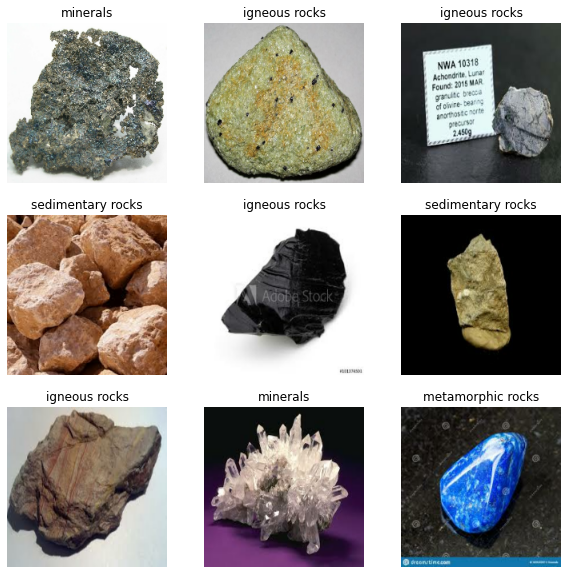

In [ ]:


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# BLAH

In [ ]:
from keras.models import load_model
loaded_model = load_model('/BTECH PROJECT/Accuracy/classifier_2022-05-26 00:26:27.439409+05:30.h5')

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5,
  batch_size=32
)


In [ ]:
print("Acurracy:", loaded_model.evaluate(val_ds, verbose=2))

173/173 - 2s - loss: 1.2136 - accuracy: 0.6139 - 2s/epoch - 10ms/step
Acurracy: [1.2136225700378418, 0.6138728260993958]


In [ ]:
def predict_image(img):
  img_4d=img.reshape(-1,200,200,3)
  prediction=loaded_model.predict(img_4d)[0]
  print(prediction)
  #return {class_names[i]: float(prediction[i]) for i in range(4) if prediction[i] > 0}
  return {class_names[i]: float(prediction[i]) for i in range(4)}

In [ ]:
!pip install gradio
import gradio as gr

In [ ]:
image = gr.inputs.Image(shape=(200,200))
label = gr.outputs.Label(num_top_classes=4  )

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://11709.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


[-0.18103147 -2.2655282  -0.4608985   2.00242   ]
[ 2.2680097  -1.6174283  -2.1244757   0.32311583]
